## Bohmian Tunneling Time

In [1]:
import matplotlib.pyplot as plt

# for reloading of modules
import importlib
from helpers import bohmian_integrator
from helpers import logging, physics2dsim_split_spin, plotting_spin, video_spin, data
from helpers import bohmian_plotter

def reload_modules():
    importlib.reload(logging)
	
    importlib.reload(physics2dsim_split_spin)
    importlib.reload(plotting_spin)
    importlib.reload(video_spin)
    importlib.reload(data)
    importlib.reload(bohmian_integrator)
    importlib.reload(bohmian_plotter)

# Call this whenever you need to reload the modules
reload_modules()

# Then your regular imports
from helpers.logging import *
from helpers.physics2dsim_split_spin import simulate_2d_spin
from helpers.plotting_spin import plot_simulation_heatmaps_spin
from helpers.video_spin import create_animation_spin
from helpers.data import *
from helpers.bohmian_integrator import *
from helpers.bohmian_plotter import *

Load data into memory

In [2]:
simulation_data_2, params_2, timestamp_2 =  load_simulation_data('./simulations_data/spin/simulation_20250424_01-57-0.005-magbar-2.pkl')
# simulation_data_4, params_4, timestamp_4 =  load_simulation_data('./simulations_data/spin/simulation_20250408_01-37-magbar-4.pkl')

In [2]:
# gaussian magnetic field - strength 2
simulation_data_2, params_2, timestamp_2 =  load_simulation_data('./simulations_data/spin/simulation_20250407_03-39-gauss-magbar-2.pkl')

In [3]:
import gc

In [ ]:
# gaussian magnetic field - strength 8
simulation_data_8, params_8, timestamp_8 =  load_simulation_data('./simulations_data/spin/simulation_20250407_17-55-gauss-magbar-8.pkl')

In [10]:
import numpy as np

def check_spinor_normalisation(sim_data, *, rtol=1e-12, verbose=True):
    """
    Check ∬ dx dy (|ψ_up|² + |ψ_down|²)  for every saved time step.

    Parameters
    ----------
    sim_data : dict
        Must contain 'psi_up_list', 'psi_down_list', 'x', 'y'.
    rtol : float
        Relative tolerance.  Any |N – 1| > rtol is flagged.
    verbose : bool
        True  – print a short report.
        False – just return the array of ||ψ||² values.

    Returns
    -------
    norms : 1-D ndarray, shape (N_t,)
        Integrated probability at each frame.
    """

    x = np.asarray(sim_data['x'])
    y = np.asarray(sim_data['y'])
    dx, dy = x[1]-x[0], y[1]-y[0]

    psi_up_all   = np.asarray(sim_data['psi_up_list'])   # (N_t, Ny, Nx)
    psi_down_all = np.asarray(sim_data['psi_down_list']) # (N_t, Ny, Nx)

    # |ψ|² summed over the grid and multiplied by the cell area
    norms = ((np.abs(psi_up_all)**2 + np.abs(psi_down_all)**2)
             .sum(axis=(-2,-1)) * dx * dy)

    if verbose:
        off = norms - 1.0
        print("frame   norm     deviation")
        print("--------------------------")
        for k, (N, dN) in enumerate(zip(norms, off)):
            flag = " ! " if abs(dN) > rtol else "   "
            print(f"{k:5d}  {N: .6e}  ({dN:+.2e}){flag}")
        bad = np.where(np.abs(off) > rtol)[0]
        if bad.size:
            print(f"\n{bad.size} frame(s) exceed the ±{rtol} tolerance.")
        else:
            print("\nAll frames within ±{:g} of 1.".format(rtol))

    return norms

In [ ]:
check_spinor_normalisation(simulation_data_2, rtol=1e-8)

I want to commit to the following process:

1. Given simulation_data_2, I want to plot the bohmian trajectories, spawned at the starting location, with a width of say sigma. For this, I want a function to return me the trajectories.
2. I want to produce a plot of the bohmian trajectories, in two plots, one plot being spin up, and the other plot being spin down. And a third for both of them, one colored red, the other blue. On the plot I want to have the magnetic barrier drawn as a circle (radius = width/2)
3. A third step, is to go through a bohmian trajectory, and follow it, until it's inside the barrier (in other words $|\vec{B}_\text{center} - \vec{r}_\text{bohmian}|^2 \leq R_\text{magnet}$). This then is stored as $\tau_\text{in}$ for the trajectory. Then we're looking for the moment that the trajectory will leave the magnetic barrier ($|\vec{B_\text{center}} - \vec{r_\text{bohmian}}|^2 \geq R_\text{magnet}$) stored in $\tau_\text{out}$. A third component is calculated for the tunneling time of the particle, through the barrier :$\tau = \tau_\text{otu} - \tau_\text{in}$. These three quantities ought to be calculated for each bohmian trajectory.
4. I want to take the avarage of the spin up and spin down trajectories, and also the average together.
5. I want to plot, on the previous graph with bohmian trajectories, the trajectories that are within the barrier, in bold red, for visual verification of the simulation. 

Step 1 - Compute Bohmian Trajectories

In [24]:
trajectories_2 = compute_bohmian_trajectories(simulation_data_2, params_2,
                                           alpha=1/np.sqrt(2),
                                           beta =1/np.sqrt(2),
                                           n_trajectories=50, random_seed=777)

CFL parameter: 12.09772607516509
C after fix = 0.24689236888092023


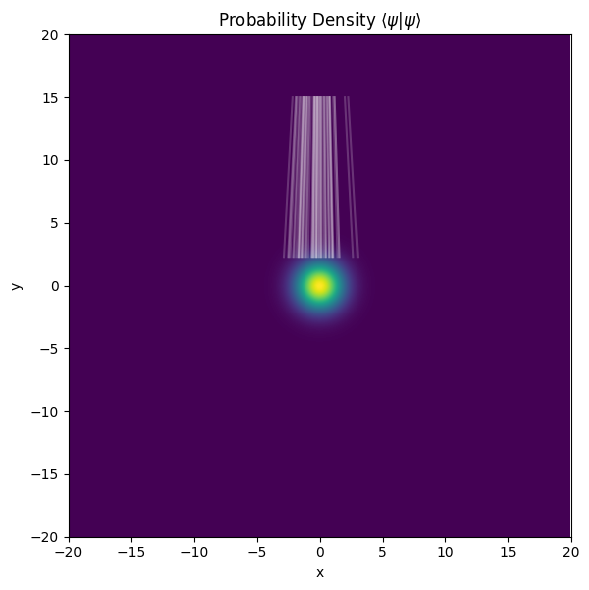

In [25]:
plot_trajectories(trajectories_2, params_2, till_frame=350, simulation_data=simulation_data_2,
					alpha=1/np.sqrt(2),
					beta =1/np.sqrt(2),
					same_chart=True
				)

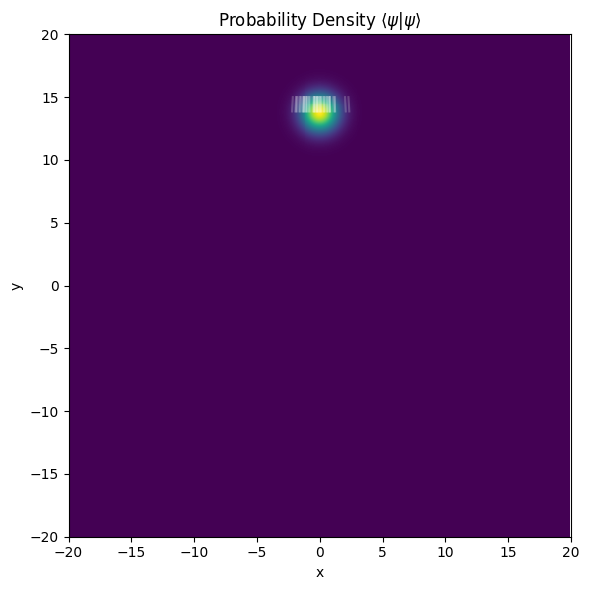

In [16]:
plot_trajectories(trajectories_2, params_2, till_frame=50, simulation_data=simulation_data_2,
					alpha=1/np.sqrt(2),
					beta =1/np.sqrt(2),
					same_chart=True
				)

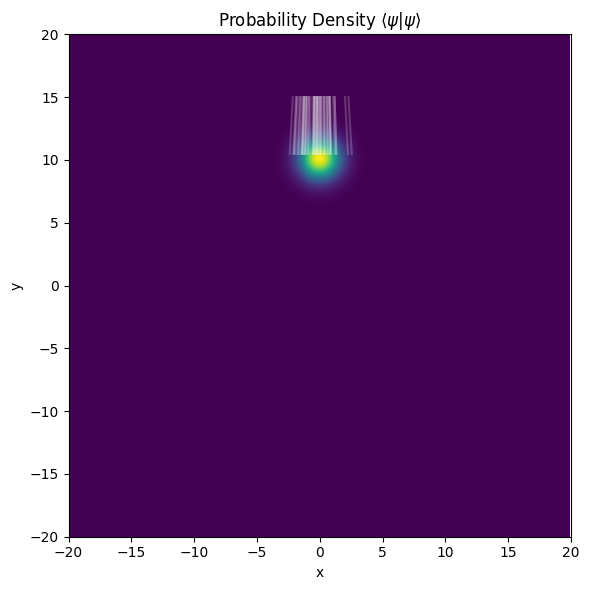

In [19]:
plot_trajectories(trajectories_2, params_2, till_frame=100, simulation_data=simulation_data_2,
					alpha=1/np.sqrt(2),
					beta =1/np.sqrt(2),
					same_chart=True
				)

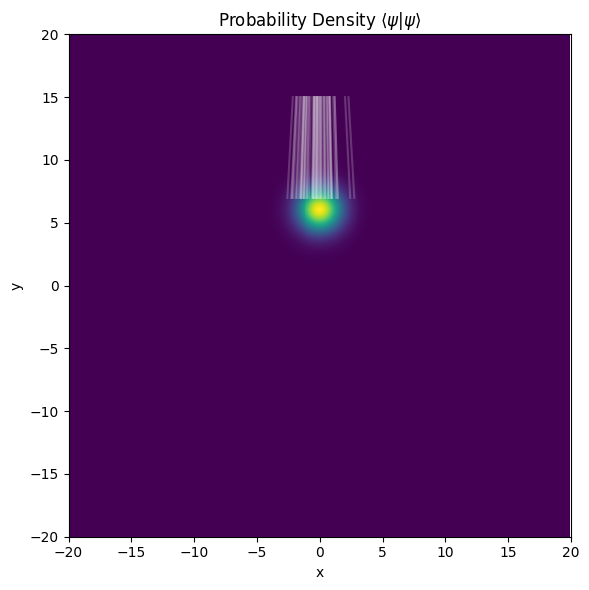

In [32]:
plot_trajectories(trajectories_2, params_2, till_frame=135, simulation_data=simulation_data_2,
					alpha=1/np.sqrt(2),
					beta =1/np.sqrt(2),
					same_chart=True
				)

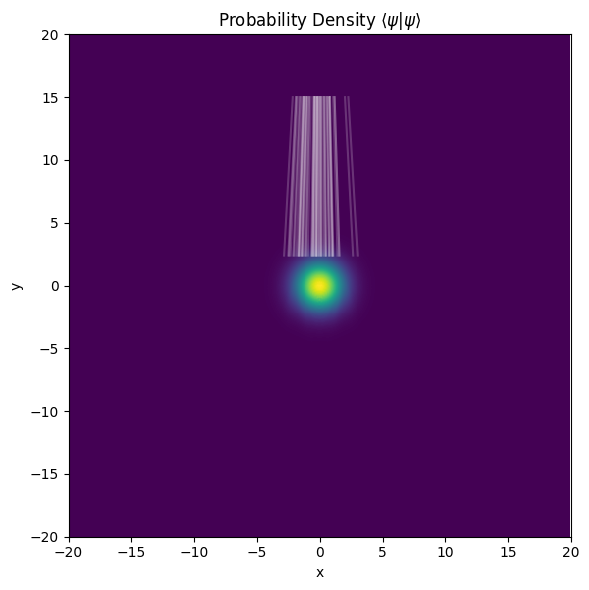

In [41]:
plot_trajectories(trajectories_2, params_2, till_frame=175, simulation_data=simulation_data_2,
					alpha=1/np.sqrt(2),
					beta =1/np.sqrt(2),
					same_chart=True
				)

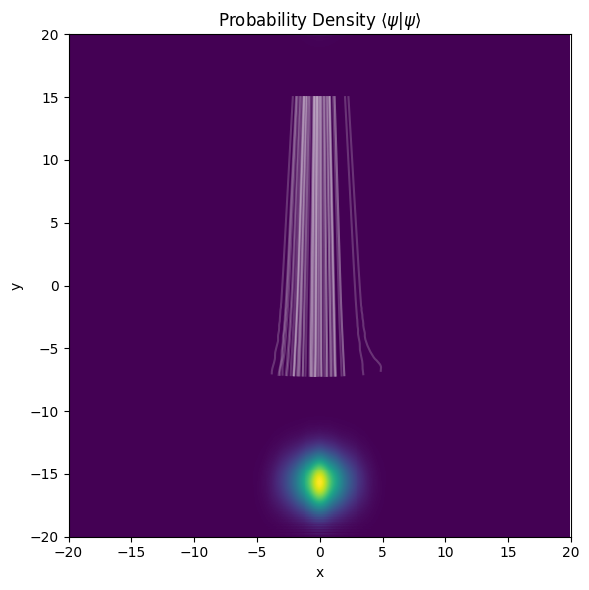

In [38]:
plot_trajectories(trajectories_2, params_2, till_frame=250, simulation_data=simulation_data_2,
					alpha=1/np.sqrt(2),
					beta =1/np.sqrt(2),
					same_chart=True
				)

In [ ]:
# Force garbage collection - run if needed
gc.collect()

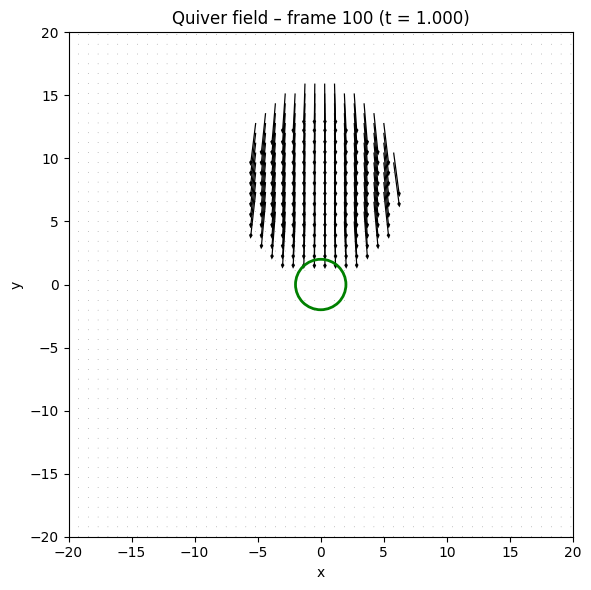

In [83]:
quick_quiver(simulation_data_2, k=100, params=params_2, stride=10, alpha=1/np.sqrt(2),
                                           beta =1/np.sqrt(2))

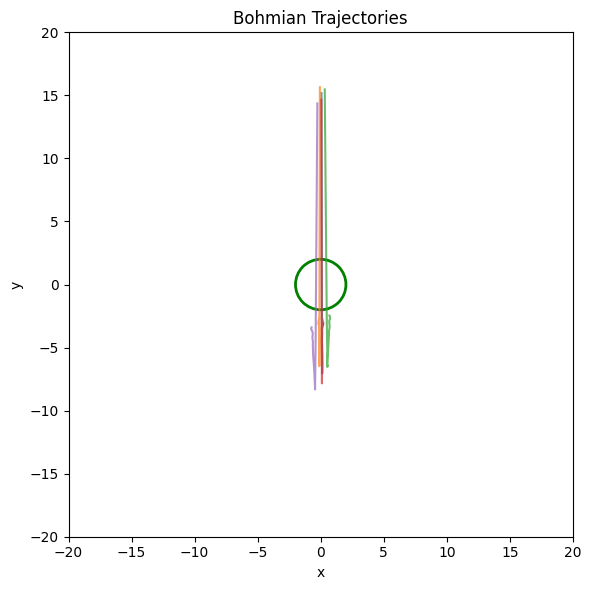

In [15]:
trajectories_4 = compute_bohmian_trajectories(simulation_data_4, params_4,
                                           alpha=1/np.sqrt(2),
                                           beta =1/np.sqrt(2),
                                           n_trajectories=5)

plot_trajectories(trajectories_4, params_4)

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def plot_probability_current(simulation_data, spin='up', time_index=0, stride=10):
    """
    Plot the probability current for a given spin at a selected time index
    as a quiver plot.
    Parameters
    ----------
    simulation_data : dict
        The simulation data dictionary with keys like 'x', 'y', 'jx_up', 'jy_up', etc.
    spin : str
        'up' or 'down'
    time_index : int
        Which time step to plot
    stride : int
        Downsampling factor for the quiver arrows (to avoid clutter).
    """
    
    # Extract the relevant arrays
    x = np.array(simulation_data['x'])
    y = np.array(simulation_data['y'])
    if spin == 'up':
        jx_arr = np.array(simulation_data['jx_up'])  # shape: (n_steps, Nx, Ny) or (n_steps, Ny, Nx)
        jy_arr = np.array(simulation_data['jy_up'])
    else:
        jx_arr = np.array(simulation_data['jx_down'])
        jy_arr = np.array(simulation_data['jy_down'])
    
    # Slice out the desired time step
    jx = jx_arr[time_index]
    jy = jy_arr[time_index]
    
    # Build mesh for plotting
    # If x, y each have shape (N, ), then X, Y (with indexing='xy') => X.shape=(Nx, Ny), Y.shape=(Nx, Ny)
    X, Y = np.meshgrid(x, y, indexing='xy')  # watch shape carefully!

    # Downsample if you want to avoid a super-dense quiver
    Xs = X[::stride, ::stride]
    Ys = Y[::stride, ::stride]
    jxs = jx[::stride, ::stride]
    jys = jy[::stride, ::stride]

    plt.figure(figsize=(8, 6))
    plt.quiver(Xs, Ys, jxs, jys, pivot='mid', angles='xy', scale_units='xy')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Probability Current for spin={spin}, time index={time_index}")
    plt.axis("equal")
    plt.show()


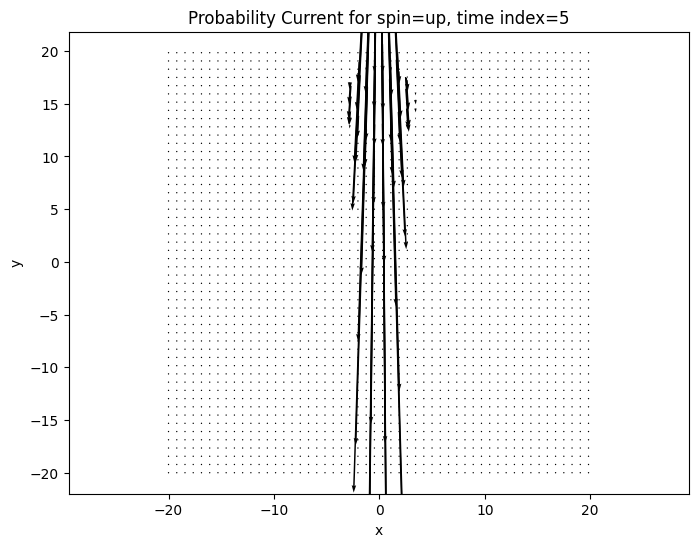

In [54]:
plot_probability_current(simulation_data_2, spin='up', time_index=5, stride=10)

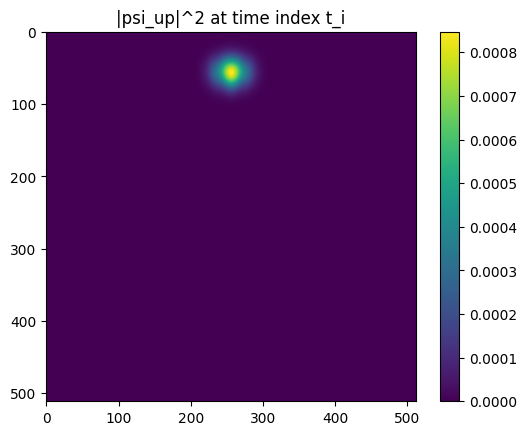

In [40]:
# Suppose psi_up has shape (Nx, Ny). Then at time t_i, do:
plt.imshow(np.abs(simulation_data_2["prob_up"][250])**2)
plt.title("|psi_up|^2 at time index t_i")
plt.colorbar()
plt.show()

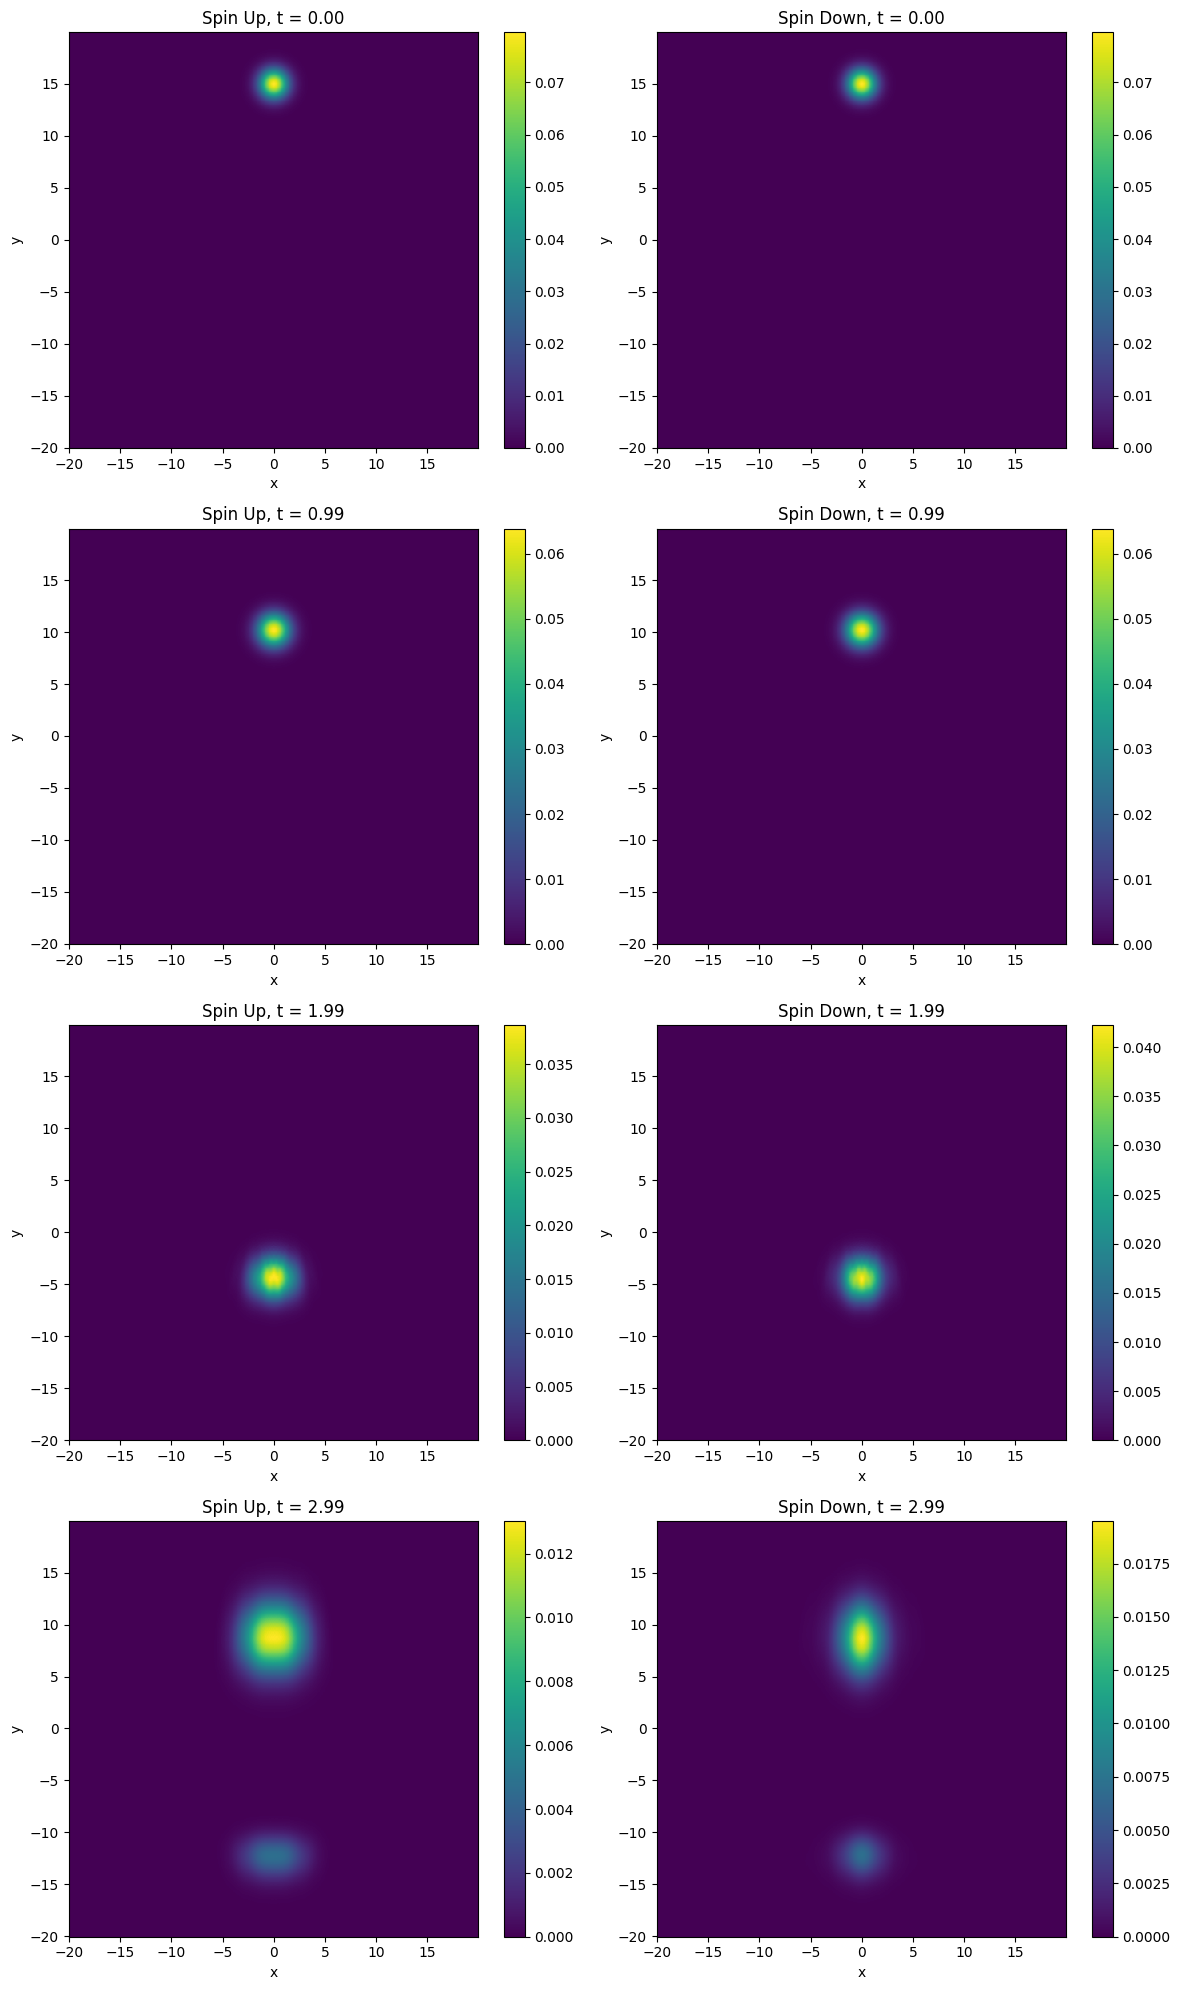

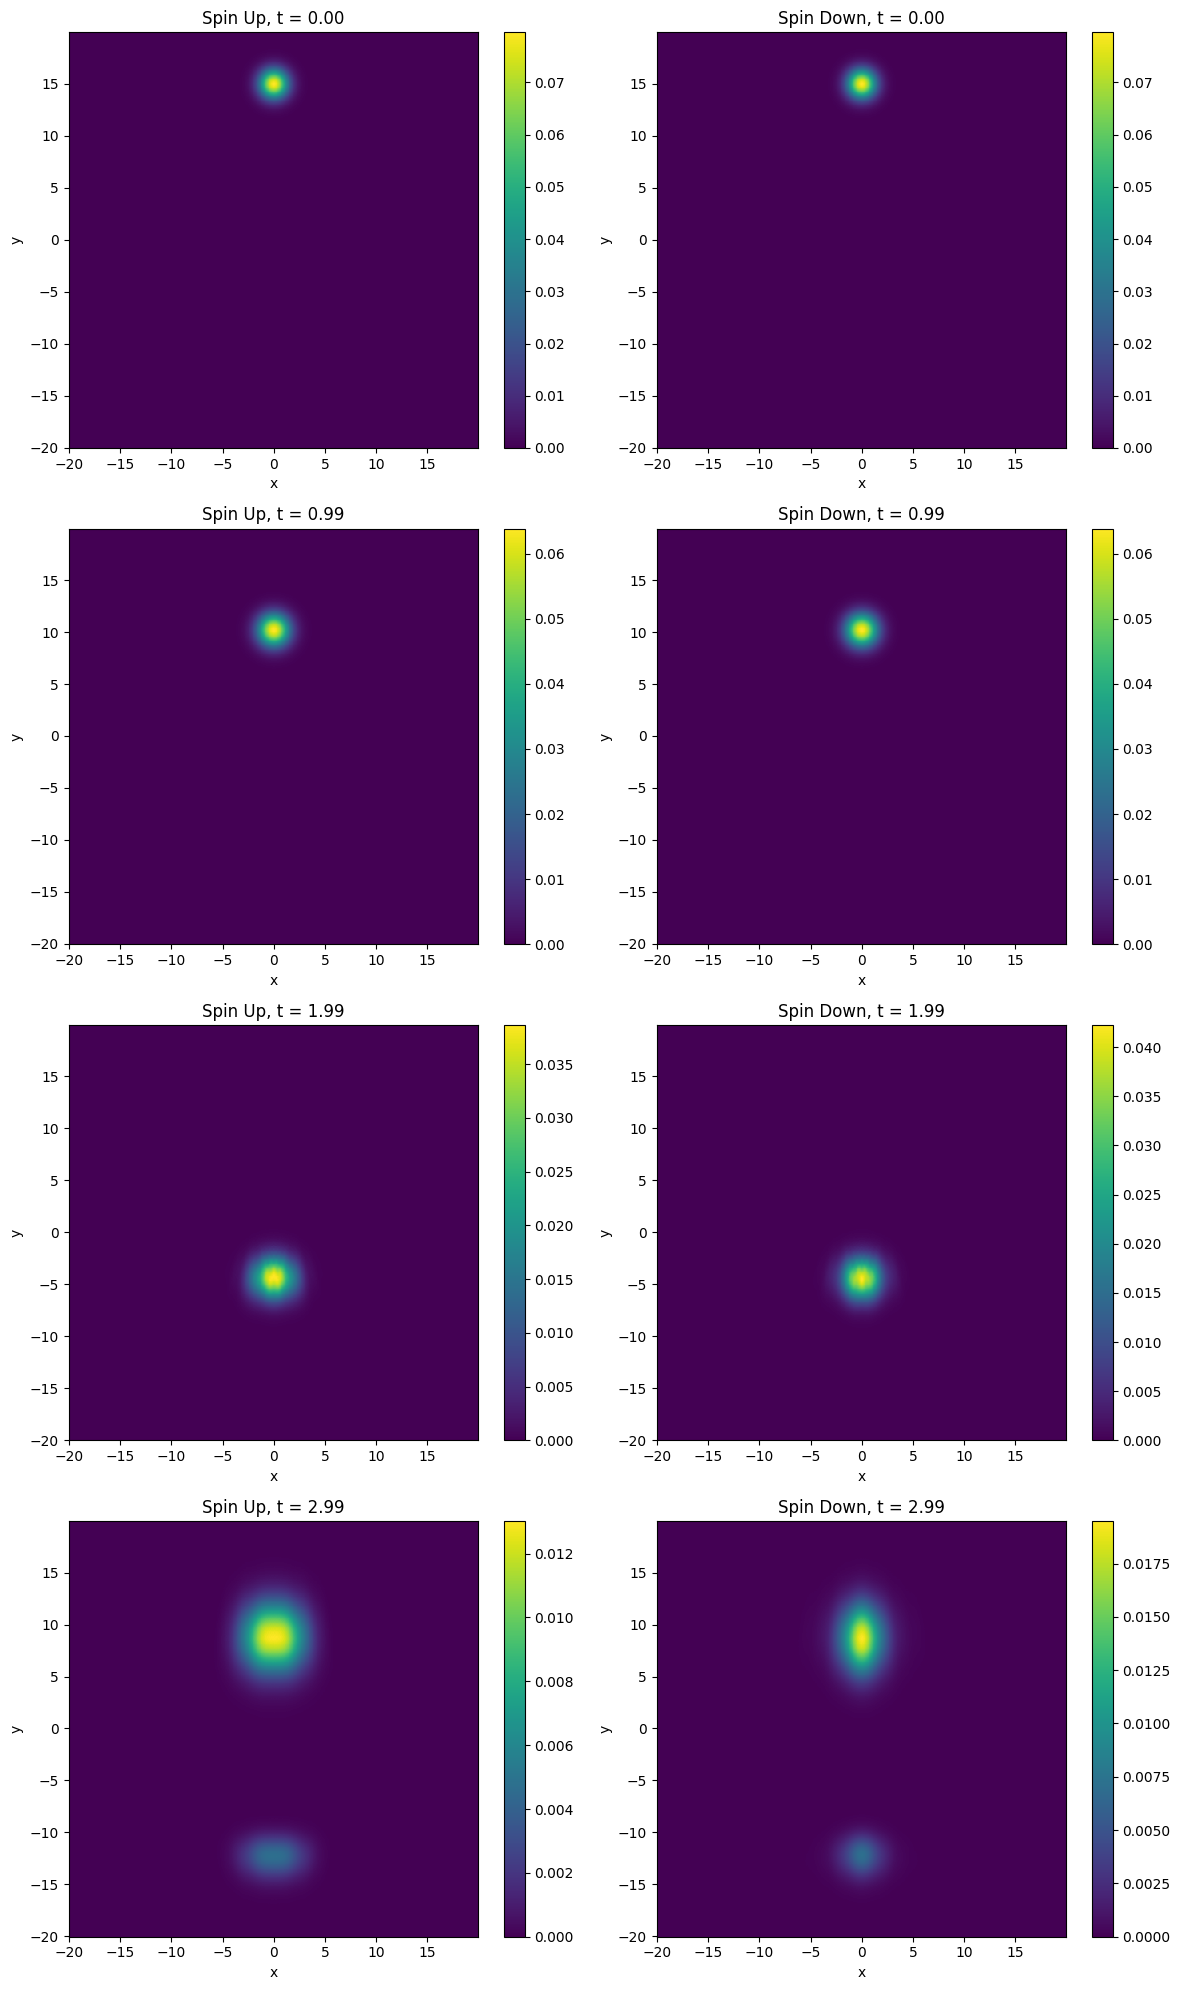

In [19]:
plot_simulation_heatmaps_spin(simulation_data_2)